In [2]:
#pip install scvelo

  Using cached scvelo-0.2.4-py3-none-any.whl (196 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge leidenalg


Note: you may need to restart the kernel to use updated packages.


In [39]:
#pip install python-igraph

  Using cached python_igraph-0.9.10-py3-none-any.whl (9.1 kB)
     ---------------------------------------- 2.8/2.8 MB 9.4 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
#pip install louvain

You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [44]:
#pip install scanpy[leiden]


     ------------------------------------ 104.9/104.9 KB 860.8 kB/s eta 0:00:00


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.13) on 2024-02-22 09:35.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [67]:
import os
os.chdir('D:/KP/mouse_brain_project/RNA_velocity_1')

In [4]:
import scanpy.external as sce

In [79]:
adata = sc.read('D:/KP/mouse_brain_project/RNA_velocity/adata_sliced_and_copied.h5ad')

In [80]:
adata

AnnData object with n_obs × n_vars = 16431 × 19490
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [81]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAAGCAGTAAT      910                910   2215.000000        96.000000   
AAACCCACAGAGAAAG     3550               3550   9514.000000       157.000000   
AAACCCACATCAACCA      660                660    967.000000        27.000000   
AAACGAAAGGTCACAG      836                835   2502.000000       127.000000   
AAACGAAAGTGGATTA      407                407    515.000000        21.000000   
...                   ...                ...           ...              ...   
TTTGGTTAGCTGTGCC      403                403    988.778015         2.318071   
TTTGGTTCACATATCG      749                749   1279.183105        40.828995   
TTTGTTGCATGGGTTT     1848               1848   1808.227051        27.851946   
TTTGTTGGTGAACGGT      240                240    155.868973         5.287396   
TTTGTTGTCCTCTCTT      250                250    159.989914         6.557476   

                  pct_counts_mt      tissue genotype leiden genotype_orig  \
AAACCCAAGCAGTAAT       4.334086  cerebellum    WT_p5     16            WT   
AAACCCACAGAGAAAG       1.650200  cerebellum    WT_p5      5            WT   
AAACCCACATCAACCA       2.792141  cerebellum    WT_p5      1            WT   
AAACGAAAGGTCACAG       5.075939  cerebellum    WT_p5      4            WT   
AAACGAAAGTGGATTA       4.077670  cerebellum    WT_p5      1            WT   
...                         ...         ...      ...    ...           ...   
TTTGGTTAGCTGTGCC       0.234438  cerebellum    KO_p5      8            KO   
TTTGGTTCACATATCG       3.191802  cerebellum    KO_p5      1            KO   
TTTGTTGCATGGGTTT       1.540290  cerebellum    KO_p5      6            KO   
TTTGTTGGTGAACGGT       3.392206  cerebellum    KO_p5      0            KO   
TTTGTTGTCCTCTCTT       4.098680  cerebellum    KO_p5      3            KO   

                 genotype_gender batch         celltype       celltype_1  \
AAACCCAAGCAGTAAT         WT_M_p5     0        Microglia        Microglia   
AAACCCACAGAGAAAG         WT_M_p5     0     Granule cell   Granule Cell 2   
AAACCCACATCAACCA         WT_M_p5     0        Astrocyte        Astrocyte   
AAACGAAAGGTCACAG         WT_M_p5     0        Astrocyte        Astrocyte   
AAACGAAAGTGGATTA         WT_M_p5     0        Astrocyte        Astrocyte   
...                          ...   ...              ...              ...   
TTTGGTTAGCTGTGCC         KO_F_p5     3  Progenitor cell  Progenitor cell   
TTTGGTTCACATATCG         KO_F_p5     3        Astrocyte        Astrocyte   
TTTGTTGCATGGGTTT         KO_F_p5     3        Microglia        Microglia   
TTTGTTGGTGAACGGT         KO_F_p5     3      erythrocyte      erythrocyte   
TTTGTTGTCCTCTCTT         KO_F_p5     3      erythrocyte      erythrocyte   

                 sample_batch  initial_size_spliced  initial_size_unspliced  \
AAACCCAAGCAGTAAT         -1-0                  1715                     100   
AAACCCACAGAGAAAG         -1-0                  4503                    3497   
AAACCCACATCAACCA         -1-0                   675                     100   
AAACGAAAGGTCACAG         -1-0                  2109                     109   
AAACGAAAGTGGATTA         -1-0                   361                      55   
...                       ...                   ...                     ...   
TTTGGTTAGCTGTGCC         -1-3                   409                      32   
TTTGGTTCACATATCG         -1-3                  1044                      39   
TTTGTTGCATGGGTTT         -1-3                  3746                     169   
TTTGTTGGTGAACGGT         -1-3                  8696                      54   
TTTGTTGTCCTCTCTT         -1-3                  8703                      65   

                  initial_size  
AAACCCAAGCAGTAAT        1715.0  
AAACCCACAGAGAAAG        4503.0  
AAACCCACATCAACCA         675.0  
AAACGAAAGGTCACAG        2109.0  
AAACGAAAGTGGATTA         361.0  
...                        ...  
TTTGGTTAGCTGTGCC         409.0  
TTTGGTTCACATATCG  

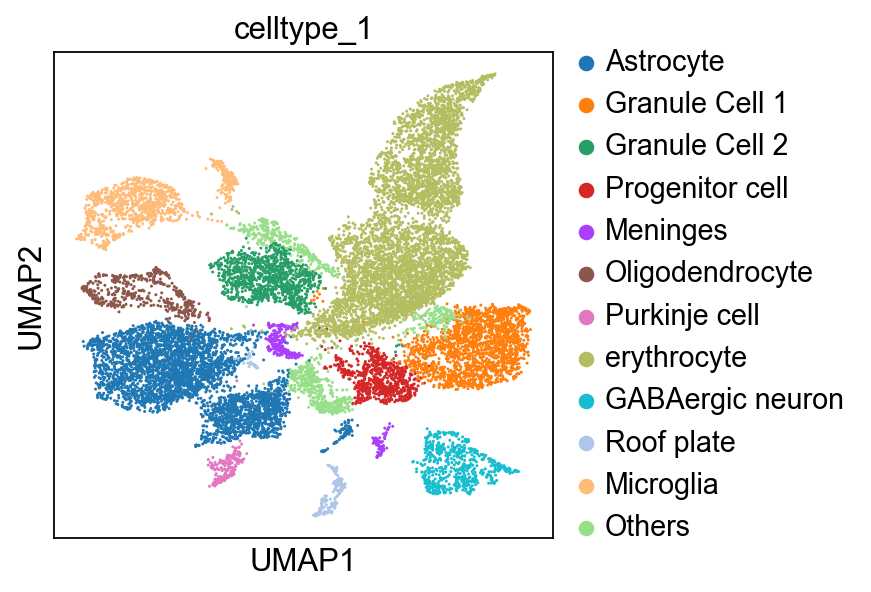

In [82]:
sc.pl.umap(adata, color=['celltype_1'])

In [83]:
adata_sub = adata[adata.obs['celltype_1'].isin(['Progenitor cell','Granule Cell 1','Granule Cell 2'])]
adata_sub

View of AnnData object with n_obs × n_vars = 3619 × 19490
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'leiden_colors', 'celltype_1_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [84]:
scv.pp.filter_and_normalize(adata_sub, min_shared_counts=20, n_top_genes=2000, enforce=True)
scv.pp.log1p(adata_sub)
adata_sub

Filtered out 10977 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


AnnData object with n_obs × n_vars = 3619 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'celltype_1_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambig

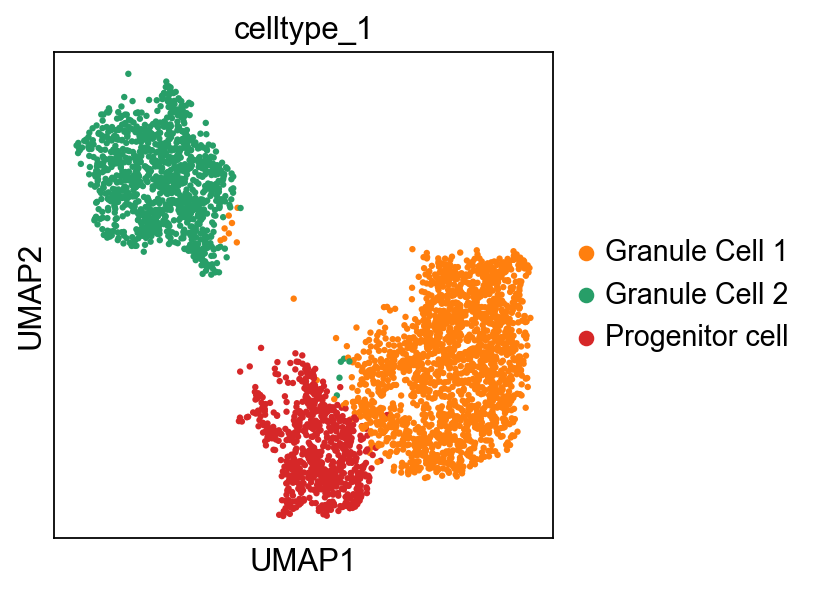

In [85]:
sc.pl.umap(adata_sub, color=['celltype_1'])

# Seperate WT and KO here

In [86]:
adata_WT = adata_sub[adata_sub.obs['genotype_orig']=='WT']
adata_WT

View of AnnData object with n_obs × n_vars = 2820 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'celltype_1_colors'
    obsm: 'X_pca', 'X_umap'
    layers

In [87]:
adata_KO = adata_sub[adata_sub.obs['genotype_orig']=='KO']
adata_KO

View of AnnData object with n_obs × n_vars = 799 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'celltype_1_colors'
    obsm: 'X_pca', 'X_umap'
    layers:

In [88]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata_WT, n_pcs=5, n_neighbors=10)
adata_WT

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 2820 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'celltype_1_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    l

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


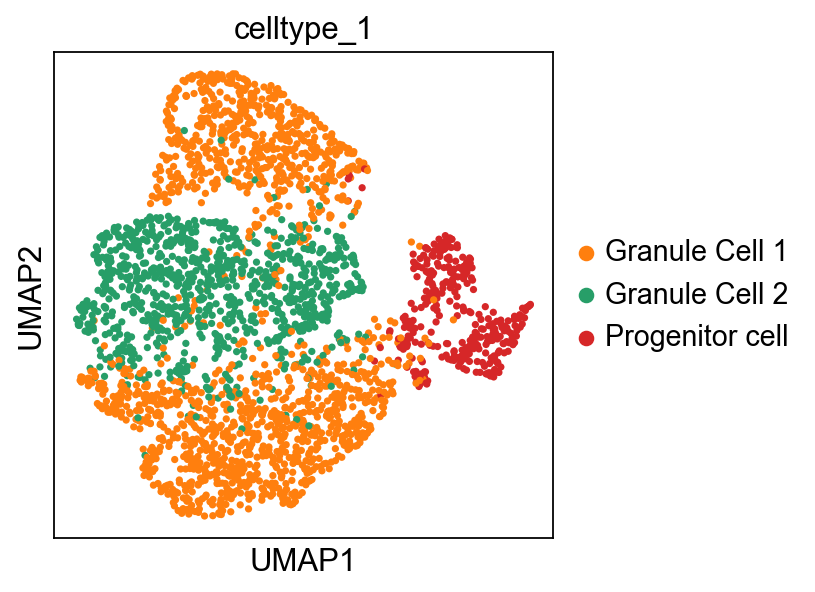

In [89]:
sc.tl.umap(adata_WT)
sc.tl.leiden(adata_WT)
sc.pl.umap(adata_WT, color=['celltype_1'])

In [90]:
scv.tl.recover_dynamics(adata_WT, n_jobs=16)
scv.tl.velocity(adata_WT, mode='dynamical', use_raw=False)
scv.tl.velocity_graph(adata_WT, n_jobs=16)
adata_WT

recovering dynamics (using 16/16 cores)


  0%|          | 0/147 [00:00<?, ?gene/s]

    finished (0:00:23) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 16/16 cores)


  0%|          | 0/2820 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 2820 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_

In [91]:
adata_WT.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGAGAAAG     3550               3550        9514.0            157.0   
AAACGAACAAGACGAC     1743               1743        4967.0            301.0   
AAACGCTAGGTCGCCT     3644               3643        9310.0             71.0   
AAAGAACCAAGGGCAT     2383               2383        4985.0            155.0   
AAAGGATTCGACTCCT     3681               3679        9634.0            365.0   
...                   ...                ...           ...              ...   
TTTGGAGCAGCAGATG     1749               1749        4310.0            178.0   
TTTGGAGCATCACAGT     5152               5151       19345.0            338.0   
TTTGGAGTCTACTCAT     1738               1738        2888.0            117.0   
TTTGGTTCAGATGCGA     4434               4434       13018.0            111.0   
TTTGTTGAGACACACG     3605               3605        9223.0            158.0   

                  pct_counts_mt      tissue genotype leiden genotype_orig  \
AAACCCACAGAGAAAG       1.650200  cerebellum    WT_p5     14            WT   
AAACGAACAAGACGAC       6.059996  cerebellum    WT_p5      4            WT   
AAACGCTAGGTCGCCT       0.762621  cerebellum    WT_p5     11            WT   
AAAGAACCAAGGGCAT       3.109328  cerebellum    WT_p5     14            WT   
AAAGGATTCGACTCCT       3.788665  cerebellum    WT_p5     11            WT   
...                         ...         ...      ...    ...           ...   
TTTGGAGCAGCAGATG       4.129930  cerebellum    WT_p5      6            WT   
TTTGGAGCATCACAGT       1.747221  cerebellum    WT_p5     16            WT   
TTTGGAGTCTACTCAT       4.051247  cerebellum    WT_p5     13            WT   
TTTGGTTCAGATGCGA       0.852666  cerebellum    WT_p5      2            WT   
TTTGTTGAGACACACG       1.713108  cerebellum    WT_p5     16            WT   

                 genotype_gender batch         celltype       celltype_1  \
AAACCCACAGAGAAAG         WT_M_p5     0     Granule cell   Granule Cell 2   
AAACGAACAAGACGAC         WT_M_p5     0     Granule cell   Granule Cell 2   
AAACGCTAGGTCGCCT         WT_M_p5     0     Granule cell   Granule Cell 2   
AAAGAACCAAGGGCAT         WT_M_p5     0     Granule cell   Granule Cell 2   
AAAGGATTCGACTCCT         WT_M_p5     0     Granule cell   Granule Cell 2   
...                          ...   ...              ...              ...   
TTTGGAGCAGCAGATG         WT_F_p5     1  Progenitor cell  Progenitor cell   
TTTGGAGCATCACAGT         WT_F_p5     1     Granule cell   Granule Cell 2   
TTTGGAGTCTACTCAT         WT_F_p5     1     Granule cell   Granule Cell 2   
TTTGGTTCAGATGCGA         WT_F_p5     1     Granule cell   Granule Cell 1   
TTTGTTGAGACACACG         WT_F_p5     1     Granule cell   Granule Cell 2   

                 sample_batch  initial_size_spliced  initial_size_unspliced  \
AAACCCACAGAGAAAG         -1-0                  4503                    3497   
AAACGAACAAGACGAC         -1-0                  3264                     991   
AAACGCTAGGTCGCCT         -1-0                  5887                    1843   
AAAGAACCAAGGGCAT         -1-0                  2247                    1930   
AAAGGATTCGACTCCT         -1-0                  5947                    2021   
...                       ...                   ...                     ...   
TTTGGAGCAGCAGATG         -1-1                  3360                     103   
TTTGGAGCATCACAGT         -1-1                 11786                    4428   
TTTGGAGTCTACTCAT         -1-1                  1530                     842   
TTTGGTTCAGATGCGA         -1-1                  8348                    2483   
TTTGTTGAGACACACG         -1-1                  5547                    2145   

                  initial_size     n_counts  velocity_self_transition  
AAACCCACAGAGAAAG        4503.0  2692.428955                  0.488924  
AAACGAACAAGACGAC        3264.0  2398.636719                  0.340829  
AAACGCTAGGTCGCCT        5887.0  2135.455811                  0.234

In [92]:
#scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
#adata

In [93]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata_WT, 'batch')
'X_pca_harmony' in adata_WT.obsm
True

2024-02-22 16:10:56,005 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-02-22 16:10:57,215 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-02-22 16:10:57,236 - harmonypy - INFO - Iteration 1 of 10
2024-02-22 16:10:57,843 - harmonypy - INFO - Iteration 2 of 10
2024-02-22 16:10:58,414 - harmonypy - INFO - Iteration 3 of 10
2024-02-22 16:10:59,012 - harmonypy - INFO - Iteration 4 of 10
2024-02-22 16:10:59,485 - harmonypy - INFO - Iteration 5 of 10
2024-02-22 16:10:59,732 - harmonypy - INFO - Iteration 6 of 10
2024-02-22 16:11:00,043 - harmonypy - INFO - Iteration 7 of 10
2024-02-22 16:11:00,297 - harmonypy - INFO - Iteration 8 of 10
2024-02-22 16:11:00,556 - harmonypy - INFO - Iteration 9 of 10
2024-02-22 16:11:00,804 - harmonypy - INFO - Iteration 10 of 10
2024-02-22 16:11:01,070 - harmonypy - INFO - Stopped before convergence


True

In [94]:
adata_WT.obsm['X_pca'] = adata_WT.obsm['X_pca_harmony']
sc.pp.neighbors(adata_WT, n_neighbors=20, n_pcs=5)
sc.tl.umap(adata_WT)


computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


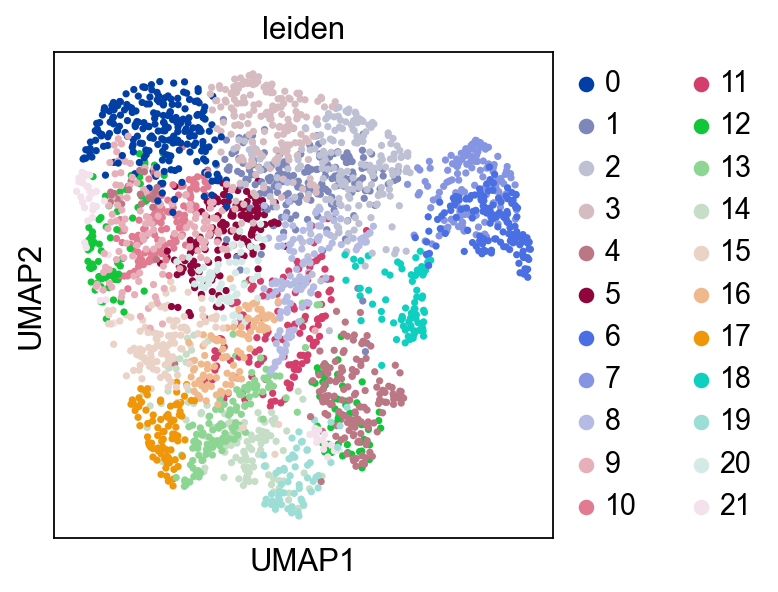

In [95]:
sc.pl.umap(adata_WT, color=['leiden'])

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


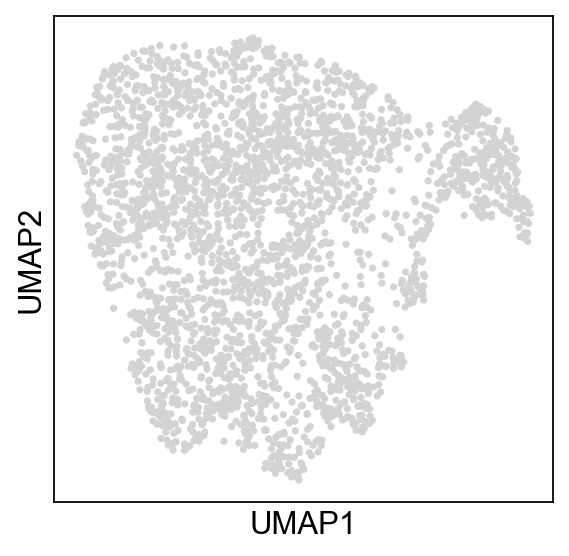

In [96]:
sc.tl.leiden(adata_WT, resolution=0.5)
sc.pl.umap(adata_WT)

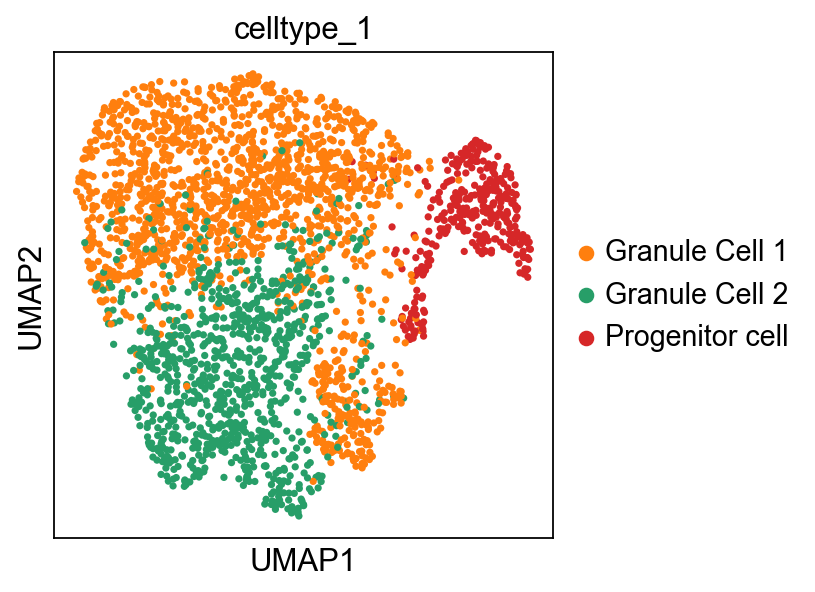

In [97]:
sc.pl.umap(adata_WT, color=['celltype_1'])

# CHECK

computing velocity graph (using 1/16 cores)


  0%|          | 0/2820 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


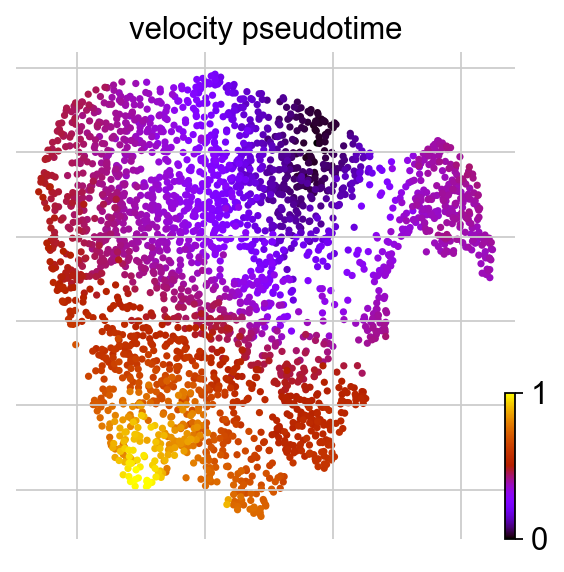

saving figure to file ./figures/scvelo__WT_root_end.pdf


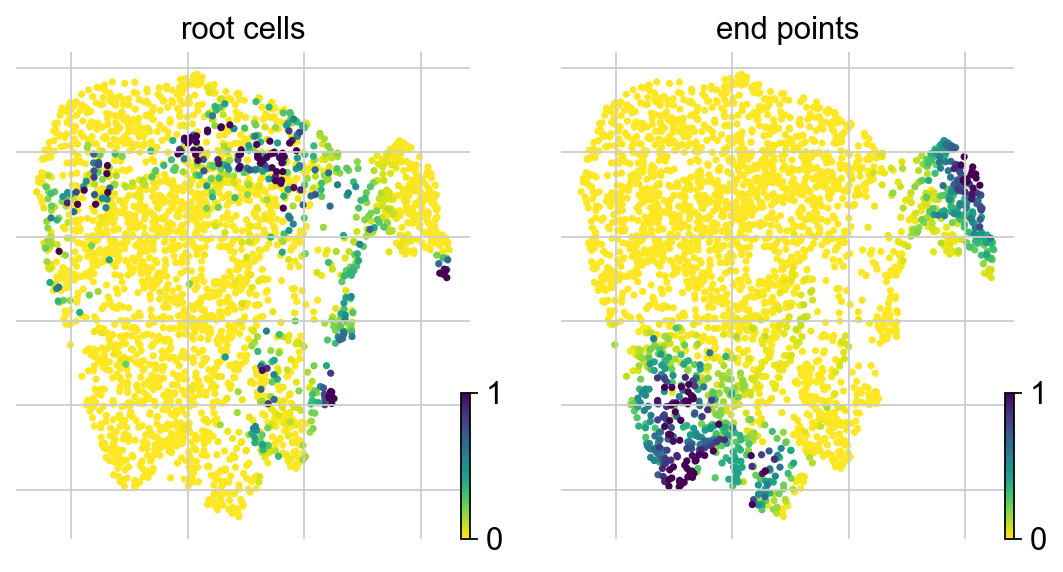

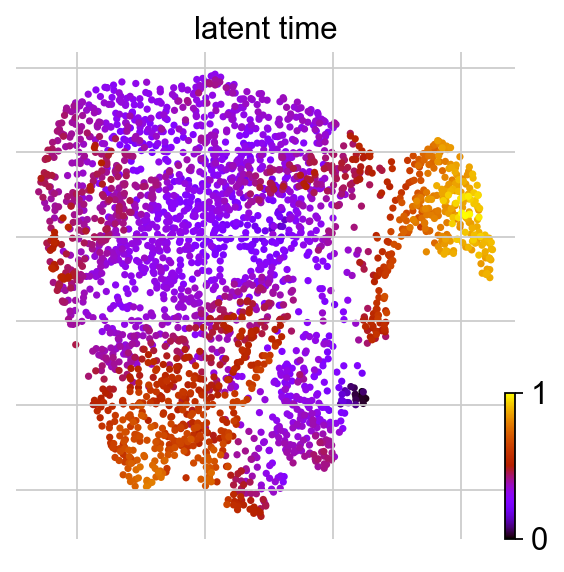

In [98]:
## for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata_WT,n_neighbors=20, mode_neighbors='connectivities')
scv.tl.terminal_states(adata_WT)
scv.tl.latent_time(adata_WT)

scv.pl.scatter(adata_WT, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata_WT, color=['root_cells', 'end_points'], save='_WT_root_end.pdf')
scv.pl.scatter(adata_WT, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


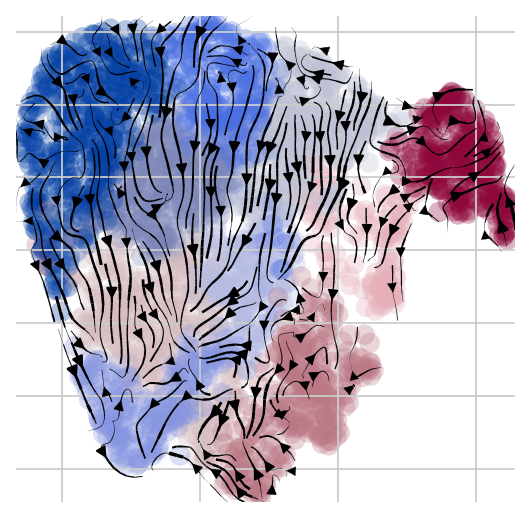

In [99]:
scv.pl.velocity_embedding_stream(adata_WT, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

saving figure to file ./figures/scvelo__WT_stream.png


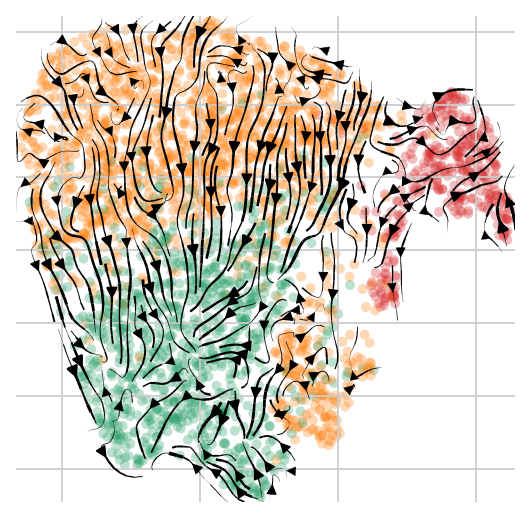

In [100]:
scv.pl.velocity_embedding_stream(adata_WT, basis='umap', color=['celltype_1'], legend_loc='none', title='',size=80, use_raw=False, frameon=False, save='_WT_stream.png')

saving figure to file ./figures/scvelo__WT_stream_umap_1.png


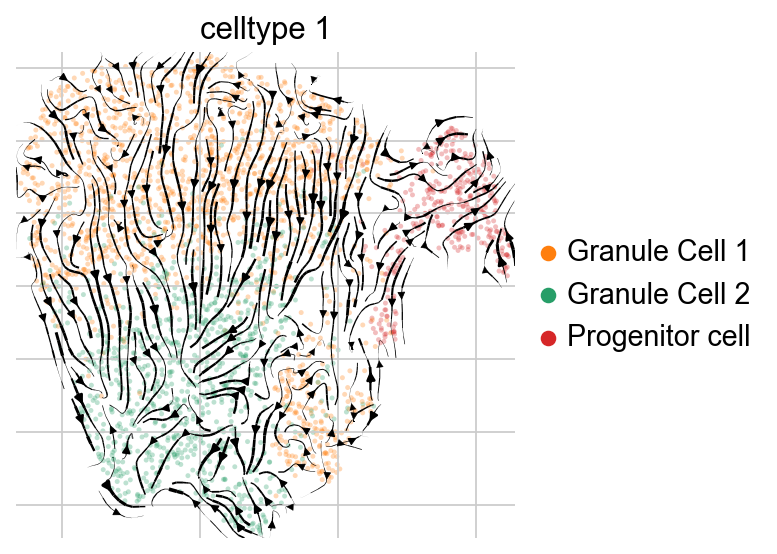

In [101]:
# n =20 
scv.pl.velocity_embedding_stream(adata_WT, density=2, min_mass=0 
                                 ,cutoff_perc=0,arrow_size=0.75, color=['celltype_1'],
                                 basis='umap',frameon=False ,legend_loc='right margin', 
                                 size=20, save='_WT_stream_umap_1.png')

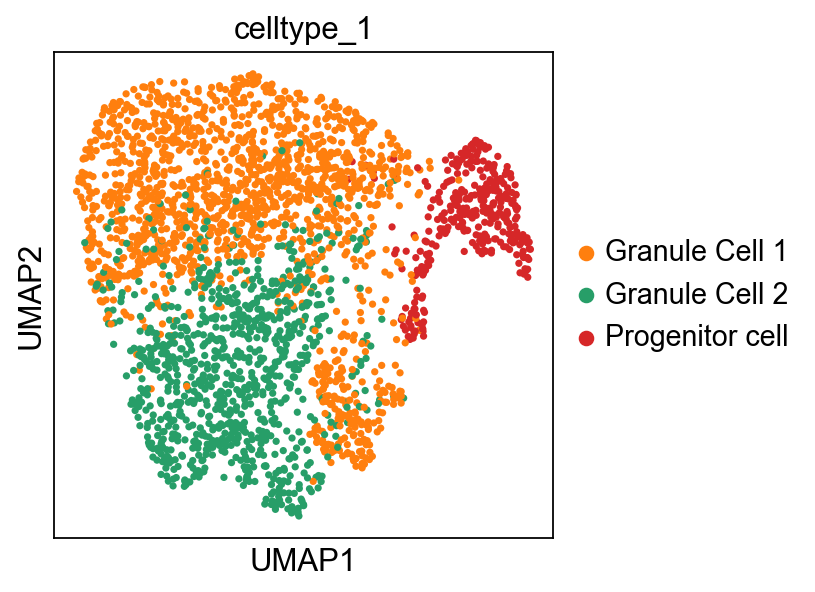

In [102]:
sc.pl.umap(adata_WT, color=['celltype_1'])

# KO

In [103]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata_KO, n_pcs=5, n_neighbors=10)
adata_KO

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 799 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'celltype_1_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    la

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


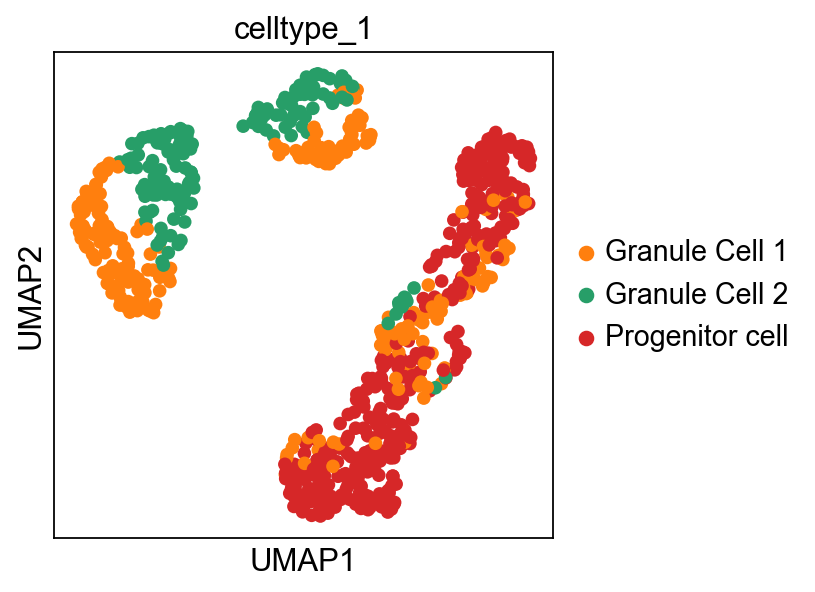

In [104]:
sc.tl.umap(adata_KO)
sc.tl.leiden(adata_KO)
sc.pl.umap(adata_KO, color=['celltype_1'])

In [105]:
scv.tl.recover_dynamics(adata_KO, n_jobs=16)
scv.tl.velocity(adata_KO, mode='dynamical', use_raw=False)
scv.tl.velocity_graph(adata_KO, n_jobs=16)
adata_KO

recovering dynamics (using 16/16 cores)


  0%|          | 0/253 [00:00<?, ?gene/s]

    finished (0:00:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 16/16 cores)


  0%|          | 0/799 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 799 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'celltype', 'celltype_1', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_s

In [106]:
adata_KO.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACGAATCATTGCGA     2092               2092   1796.027588        14.142064   
AAAGGATAGACTCGAG      850                850   1371.743652        17.962416   
AAAGGTACAAGCTACT     1649               1649   1714.307983        28.672667   
AAATGGACATGTTTGG     1432               1432   1606.053711        14.160269   
AACAACCAGAGGACTC      700                700   1218.252563        18.781349   
...                   ...                ...           ...              ...   
TTTCGATAGACAACAT     1836               1836   1893.077393        27.750053   
TTTGATCAGCTGTGCC     1712               1712   1822.632935        27.374592   
TTTGATCGTACTGTTG     1121               1121   1645.098511        27.751135   
TTTGGAGCAGGTAGTG     1963               1963   1967.344238        24.910980   
TTTGGTTAGCTGTGCC      403                403    988.778015         2.318071   

                  pct_counts_mt      tissue genotype leiden genotype_orig  \
AAACGAATCATTGCGA       0.787408  cerebellum    KO_p5      1            KO   
AAAGGATAGACTCGAG       1.309459  cerebellum    KO_p5      5            KO   
AAAGGTACAAGCTACT       1.672550  cerebellum    KO_p5      1            KO   
AAATGGACATGTTTGG       0.881681  cerebellum    KO_p5      1            KO   
AACAACCAGAGGACTC       1.541663  cerebellum    KO_p5      3            KO   
...                         ...         ...      ...    ...           ...   
TTTCGATAGACAACAT       1.465870  cerebellum    KO_p5      0            KO   
TTTGATCAGCTGTGCC       1.501926  cerebellum    KO_p5      0            KO   
TTTGATCGTACTGTTG       1.686898  cerebellum    KO_p5      9            KO   
TTTGGAGCAGGTAGTG       1.266224  cerebellum    KO_p5      7            KO   
TTTGGTTAGCTGTGCC       0.234438  cerebellum    KO_p5      6            KO   

                 genotype_gender batch         celltype       celltype_1  \
AAACGAATCATTGCGA         KO_M_p5     2  Progenitor cell  Progenitor cell   
AAAGGATAGACTCGAG         KO_M_p5     2  Progenitor cell  Progenitor cell   
AAAGGTACAAGCTACT         KO_M_p5     2  Progenitor cell  Progenitor cell   
AAATGGACATGTTTGG         KO_M_p5     2  Progenitor cell  Progenitor cell   
AACAACCAGAGGACTC         KO_M_p5     2  Progenitor cell  Progenitor cell   
...                          ...   ...              ...              ...   
TTTCGATAGACAACAT         KO_F_p5     3  Progenitor cell  Progenitor cell   
TTTGATCAGCTGTGCC         KO_F_p5     3  Progenitor cell  Progenitor cell   
TTTGATCGTACTGTTG         KO_F_p5     3  Progenitor cell  Progenitor cell   
TTTGGAGCAGGTAGTG         KO_F_p5     3     Granule cell   Granule Cell 2   
TTTGGTTAGCTGTGCC         KO_F_p5     3  Progenitor cell  Progenitor cell   

                 sample_batch  initial_size_spliced  initial_size_unspliced  \
AAACGAATCATTGCGA         -1-2                  4866                     166   
AAAGGATAGACTCGAG         -1-2                  1149                      51   
AAAGGTACAAGCTACT         -1-2                  2594                     119   
AAATGGACATGTTTGG         -1-2                  2692                     103   
AACAACCAGAGGACTC         -1-2                  1022                      40   
...                       ...                   ...                     ...   
TTTCGATAGACAACAT         -1-3                  3523                     155   
TTTGATCAGCTGTGCC         -1-3                  3268                      97   
TTTGATCGTACTGTTG         -1-3                  1510                      66   
TTTGGAGCAGGTAGTG         -1-3                  2652                     935   
TTTGGTTAGCTGTGCC         -1-3                   409                      32   

                  initial_size     n_counts  velocity_self_transition  
AAACGAATCATTGCGA        4866.0  1151.938965                  0.734502  
AAAGGATAGACTCGAG        1149.0  3747.604980                  0.991492  
AAAGGTACAAGCTACT        2594.0  2047.090332                  0.642

In [107]:
#scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
#adata

In [108]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata_KO, 'batch')
'X_pca_harmony' in adata_KO.obsm
True

2024-02-22 16:11:25,340 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-02-22 16:11:25,489 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-02-22 16:11:25,489 - harmonypy - INFO - Iteration 1 of 10
2024-02-22 16:11:25,573 - harmonypy - INFO - Iteration 2 of 10
2024-02-22 16:11:25,656 - harmonypy - INFO - Converged after 2 iterations


True

In [109]:
adata_KO.obsm['X_pca'] = adata_KO.obsm['X_pca_harmony']
sc.pp.neighbors(adata_KO, n_neighbors=20, n_pcs=5)
sc.tl.umap(adata_KO)


computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


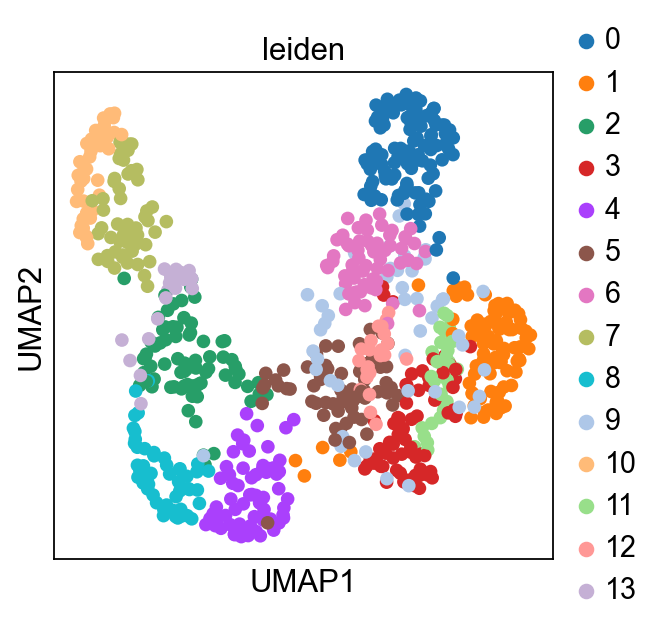

In [110]:
sc.pl.umap(adata_KO, color=['leiden'])

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


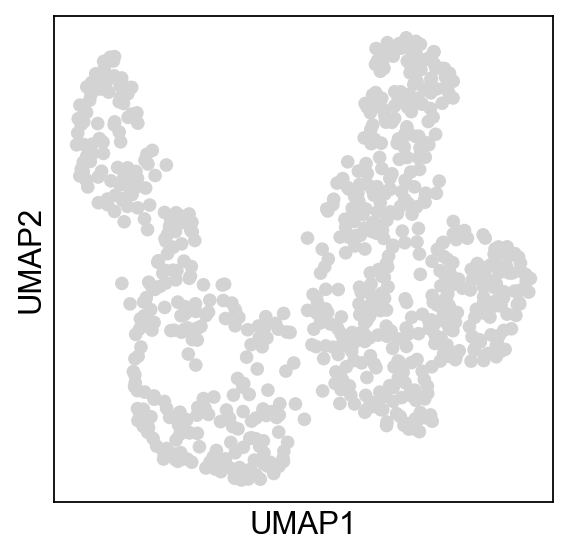

In [111]:
sc.tl.leiden(adata_KO, resolution=0.5)
sc.pl.umap(adata_KO)

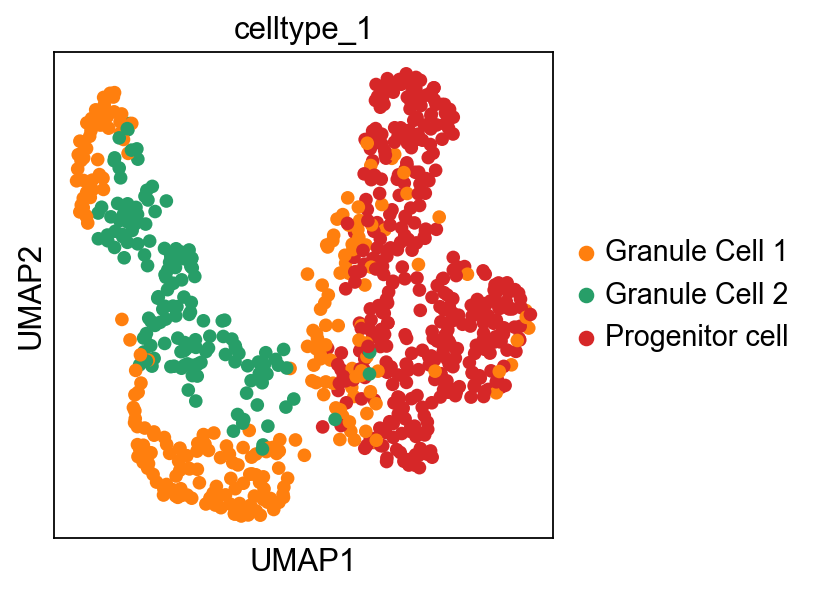

In [112]:
sc.pl.umap(adata_KO, color=['celltype_1'])

# CHECK

computing velocity graph (using 1/16 cores)


  0%|          | 0/799 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


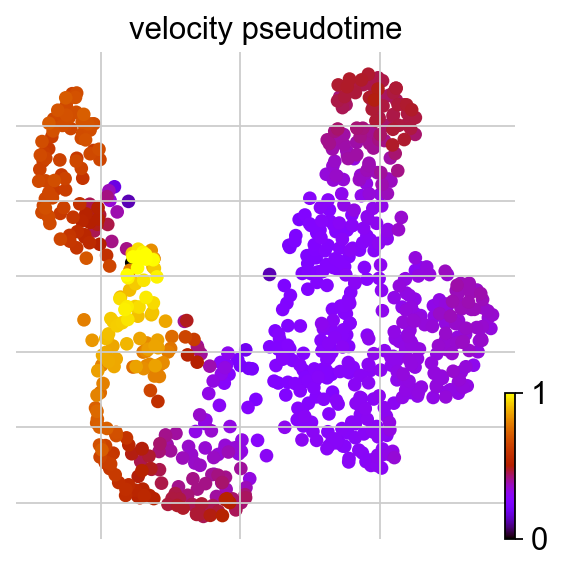

saving figure to file ./figures/scvelo__KO_root_end.pdf


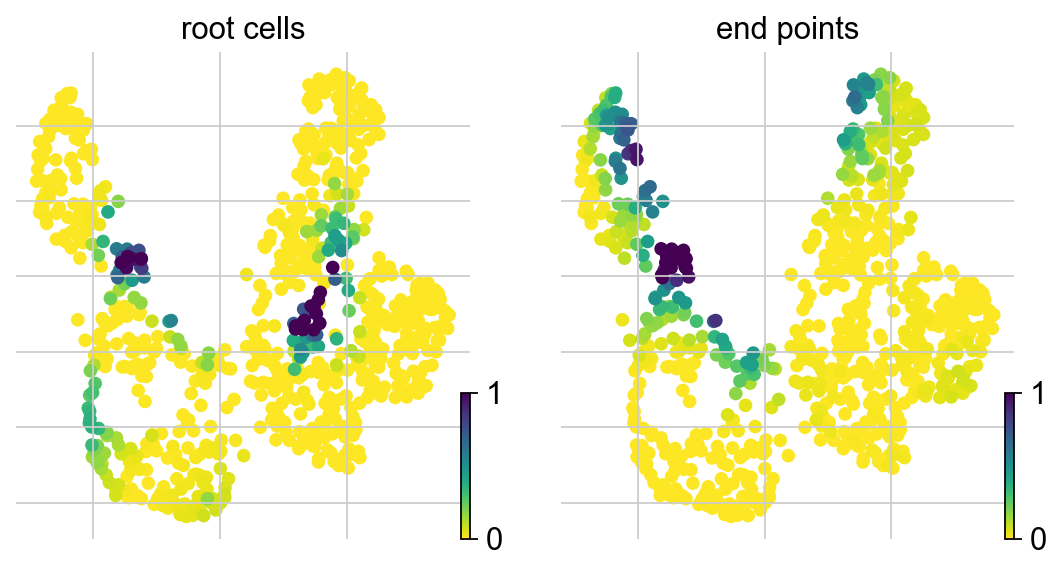

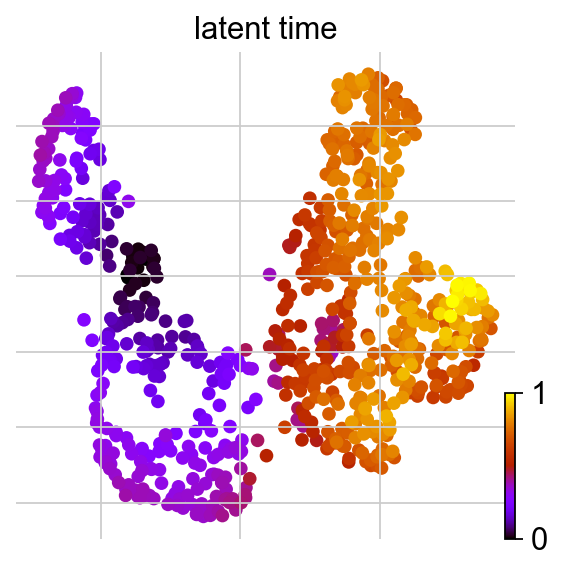

In [113]:
## for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata_KO,n_neighbors=20, mode_neighbors='connectivities')
scv.tl.terminal_states(adata_KO)
scv.tl.latent_time(adata_KO)

scv.pl.scatter(adata_KO, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata_KO, color=['root_cells', 'end_points'], save='_KO_root_end.pdf')
scv.pl.scatter(adata_KO, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


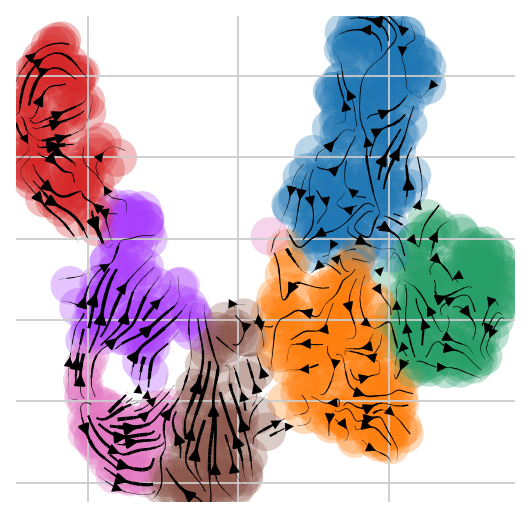

In [114]:
scv.pl.velocity_embedding_stream(adata_KO, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

saving figure to file ./figures/scvelo__KO_stream.png


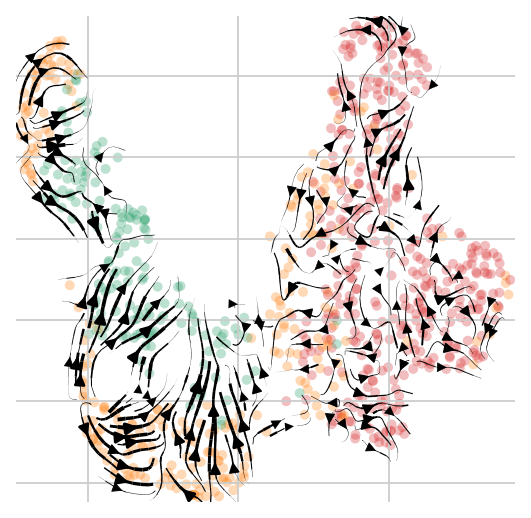

In [115]:
scv.pl.velocity_embedding_stream(adata_KO, basis='umap',size=80, color=['celltype_1'], legend_loc='none', title='', use_raw=False, frameon=False, save='_KO_stream.png')

saving figure to file ./figures/scvelo__KO_stream_umap_1.png


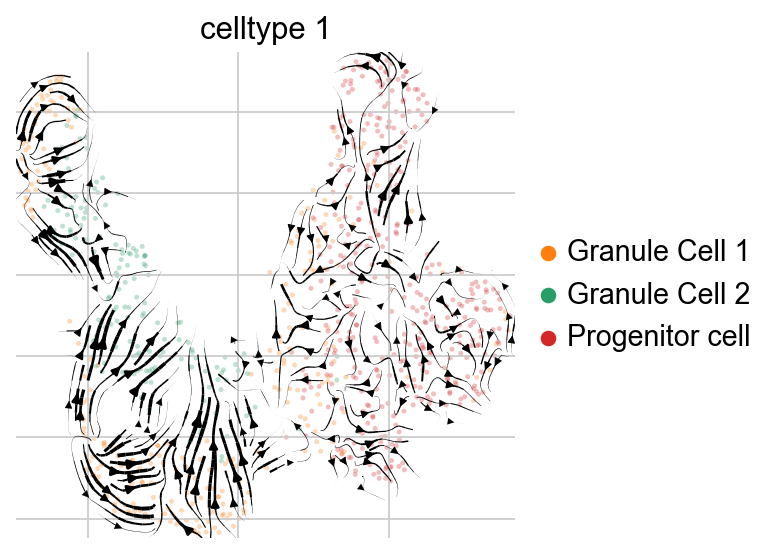

In [116]:
# n =20 
scv.pl.velocity_embedding_stream(adata_KO, density=2, min_mass=0 
                                 ,cutoff_perc=0,arrow_size=0.75, color=['celltype_1'],
                                 basis='umap',frameon=False ,legend_loc='right margin', 
                                 size=20, save='_KO_stream_umap_1.png')

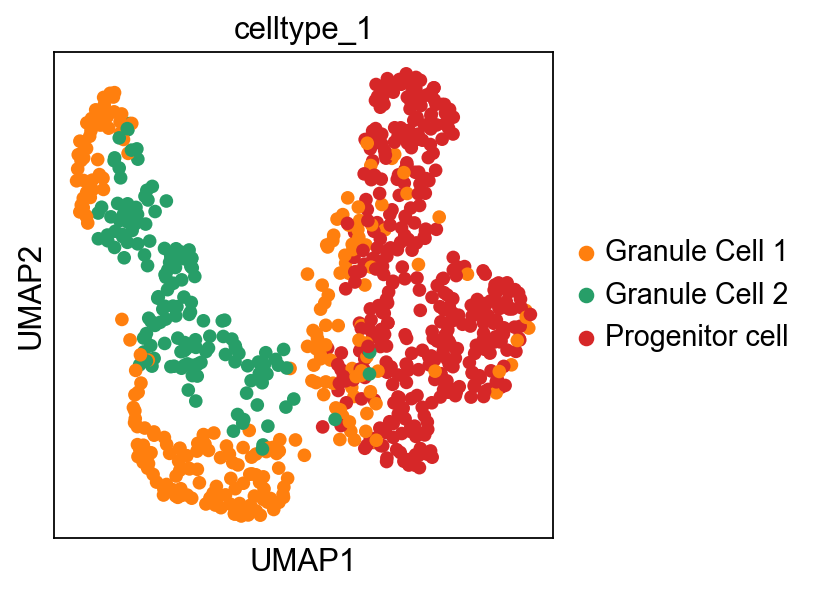

In [117]:
sc.pl.umap(adata_KO, color=['celltype_1'])